## HW3 Minimum spanning tree 알고리즘 조사

##### MST 추출 알고리즘 중, Prim 혹은 Sollin 알고리즘 택일 후 조사  
 
1) Core idea  
2) Working example  
    note) Kruskal 알고리즘 시 활용한 예제 그래프 활용  
3) Pseudo code  
4) Time complexity  
  
- 제출 문서: pptx 혹은 pdf

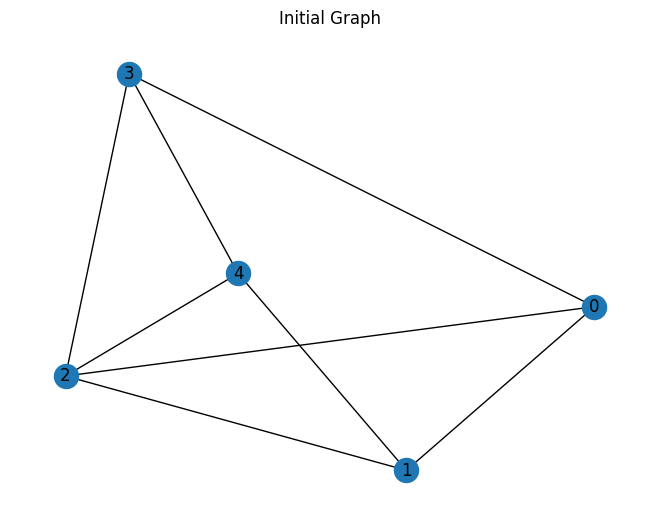

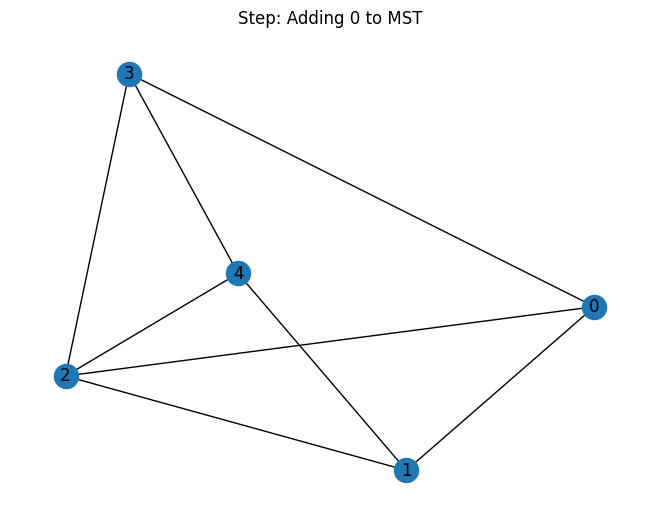

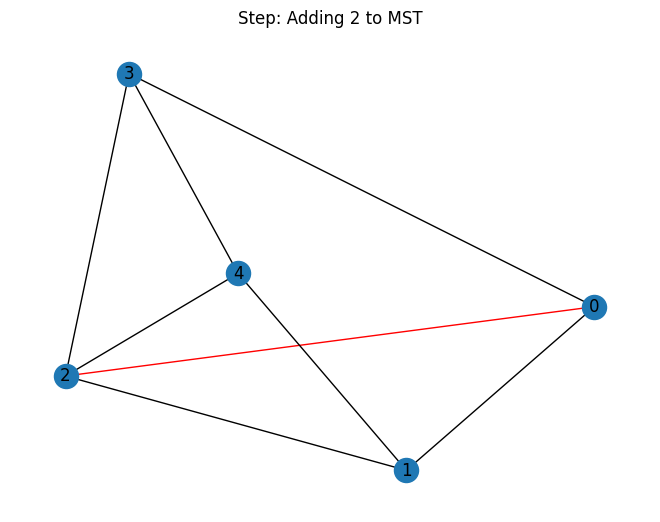

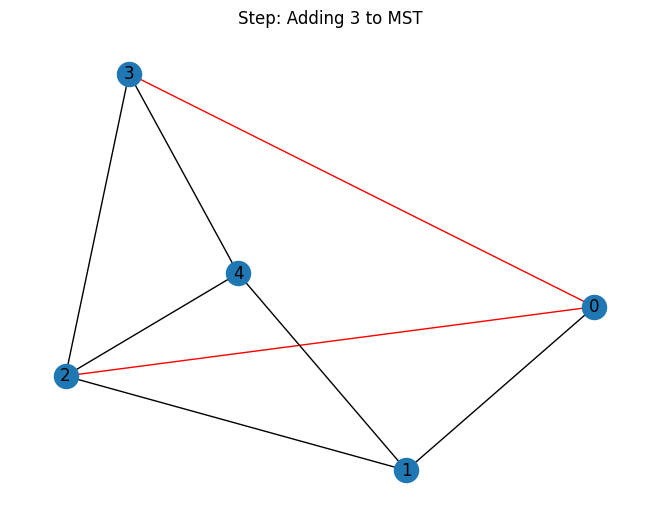

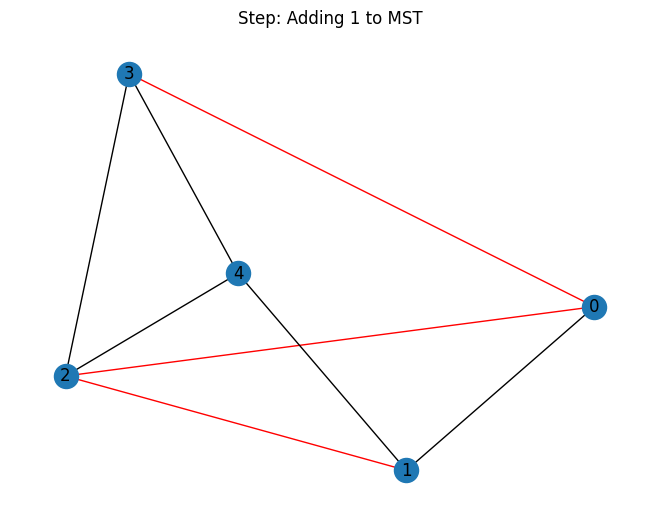

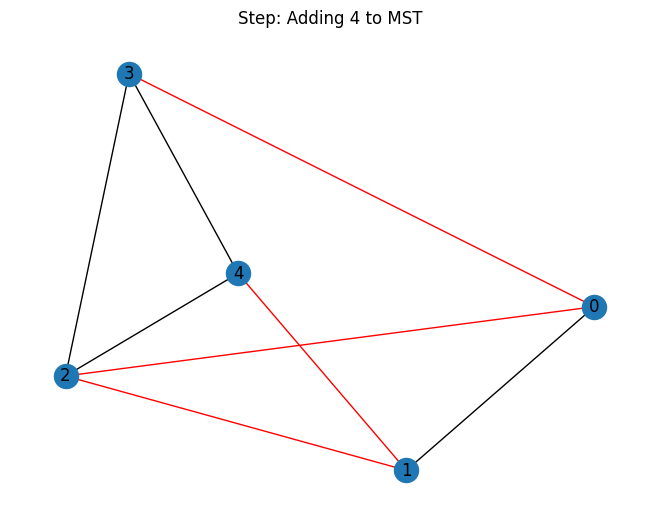

Minimum Spanning Tree:
[(0, 2, 1), (0, 3, 1), (2, 1, 2), (1, 4, 6)]
Total Weight: 10


In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def prim_mst_visualization(graph, start_node):
    mst = []
    visited = set()
    heap = [(0, start_node, None)]  # (가중치, 정점, 부모 정점)
    total_weight = 0

    # 그래프 생성
    G = nx.Graph()
    for node in graph:
        G.add_node(node)
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors:
            G.add_edge(node, neighbor, weight=weight, color = 'black')

    # 시각화를 위한 초기 레이아웃
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.title("Initial Graph")
    plt.show()

    while heap:
        weight, node, parent = heap.pop(0)
        if node not in visited:
            visited.add(node)
            if parent is not None:
                mst.append((parent, node, weight))
                total_weight += weight

                # 최소 신장 트리 간선 강조
                G.edges[parent, node]['color'] = 'red'

            # 현재 상태 시각화
            nx.draw(G, pos, with_labels=True, edge_color=[G.edges[u, v]['color'] for u, v in G.edges])
            plt.title(f"Step: Adding {node} to MST")
            plt.show()

            for neighbor, weight in graph[node]:
                if neighbor not in visited:
                    heap.append((weight, neighbor, node))
                    heap.sort()

    return mst, total_weight

# 예제 그래프
graph = {
    0: [(1, 5), (2, 1), (3, 1)],
    1: [(0, 5), (2, 2), (4, 6)],
    2: [(0, 1), (1, 2), (3, 3), (4, 6)],
    3: [(0, 1), (2, 3), (4, 6)],
    4: [(1, 6), (2, 6), (3, 6)]
}

start_node = 0

mst, total_weight = prim_mst_visualization(graph, start_node)
print("Minimum Spanning Tree:")
print(mst)
print(f"Total Weight: {total_weight}")

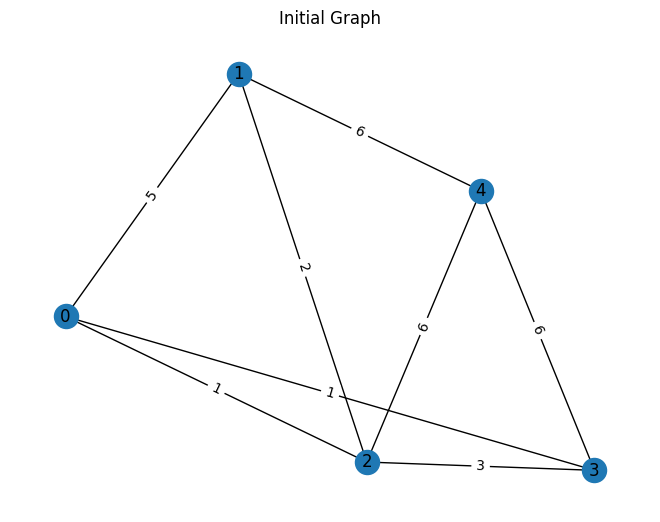

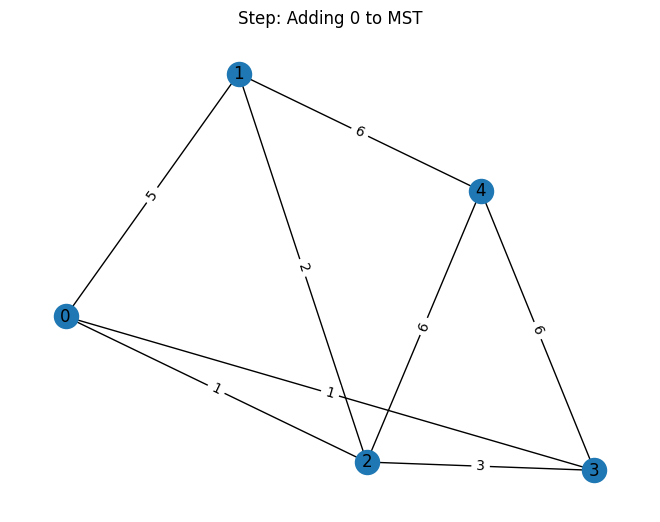

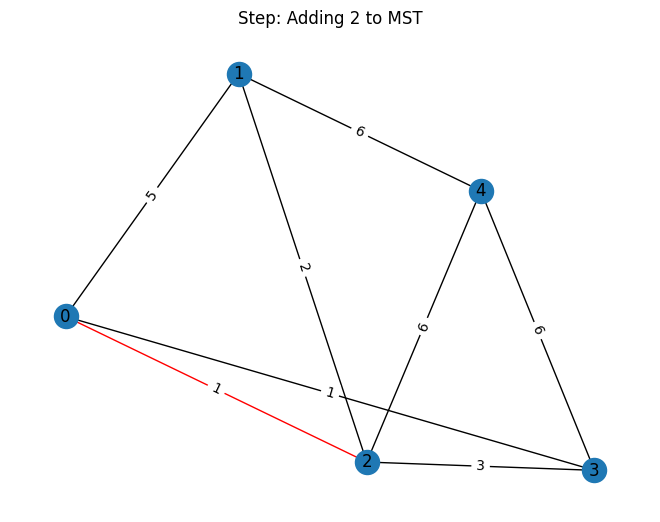

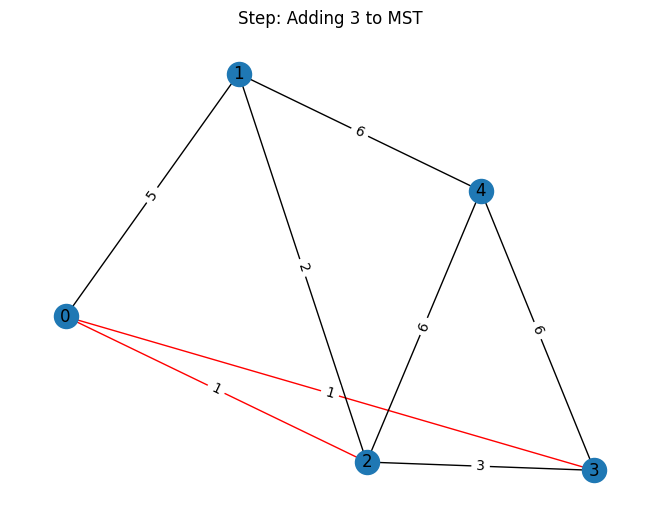

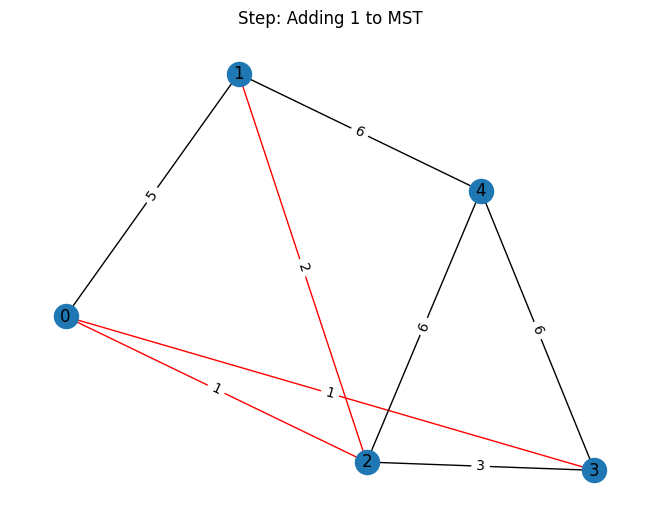

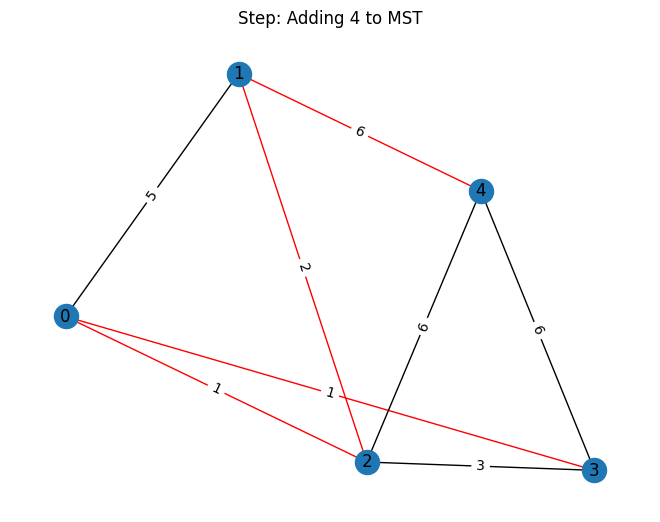

Minimum Spanning Tree:
[(0, 2, 1), (0, 3, 1), (2, 1, 2), (1, 4, 6)]
Total Weight: 10


In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def prim_mst_visualization(graph, start_node):
    mst = []
    visited = set()
    heap = [(0, start_node, None)]  # (가중치, 정점, 부모 정점)
    total_weight = 0

    # 그래프 생성
    G = nx.Graph()
    for node in graph:
        G.add_node(node)
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors:
            G.add_edge(node, neighbor, weight=weight, color='black')

    # 시각화를 위한 초기 레이아웃
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Initial Graph")
    plt.show()

    while heap:
        weight, node, parent = heap.pop(0)
        if node not in visited:
            visited.add(node)
            if parent is not None:
                mst.append((parent, node, weight))
                total_weight += weight

                # 최소 신장 트리 간선 강조
                G.edges[parent, node]['color'] = 'red'

            # 현재 상태 시각화
            edge_colors = [G.edges[u, v].get('color', 'black') for u, v in G.edges]
            nx.draw(G, pos, with_labels=True, edge_color=edge_colors)
            labels = nx.get_edge_attributes(G, 'weight')
            nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
            plt.title(f"Step: Adding {node} to MST")
            plt.show()

            for neighbor, weight in graph[node]:
                if neighbor not in visited:
                    heap.append((weight, neighbor, node))
                    heap.sort()

    return mst, total_weight

# 예제 그래프
graph = {
    0: [(1, 5), (2, 1), (3, 1)],
    1: [(0, 5), (2, 2), (4, 6)],
    2: [(0, 1), (1, 2), (3, 3), (4, 6)],
    3: [(0, 1), (2, 3), (4, 6)],
    4: [(1, 6), (2, 6), (3, 6)]
}

start_node = 0

mst, total_weight = prim_mst_visualization(graph, start_node)
print("Minimum Spanning Tree:")
print(mst)
print(f"Total Weight: {total_weight}")